In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("bike_sharing.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
print(df.shape)

(17379, 17)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [37]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#Data visualization

Creating a new df_visualise for visualisation.

Specific changes maded:
1. Denormalising some columns like humidity, temp
2. Giving season names to values in (seasons), names to months instead of numerical values and replacing actual year rather than 0 and 1 in yr coloumn.

These changes make the data more human readable.

In [3]:
df_visualise = df.copy()

In [4]:
# instead of 0 representing 2011 and 1 representing 2012 in yr coloumn, I am substituting the actual year value.

df_visualise['dteday'] = pd.to_datetime(df_visualise['dteday'], format='%d/%m/%Y', errors='coerce')
df_visualise['yr'] = df_visualise['dteday'].dt.year
df_visualise.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [6]:
# Map numerical season values to their corresponding names in the 'season' column
df_visualise['season'] = df_visualise['season'].map({1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'})
df_visualise.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
df_visualise['mnth'] = df_visualise['dteday'].dt.month_name()
df_visualise.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,January,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,2011,January,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2011,January,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [7]:
# I denormalized the data to restore it to its original scale, making it easier to interpret and visualize meaningful temperature, humidity, and wind speed values."

df_visualise['temp'] = df_visualise['temp'] * 41
df_visualise['atemp'] = df_visualise['atemp'] * 50
df_visualise['hum'] = df_visualise['hum'] * 100
df_visualise['windspeed'] = df_visualise['windspeed'] * 67


**The next 3 plots are for understanding the data inside these specific coloumns.**
<br>

Plotting Histogram, Box plot and Line plot for ['temp', 'atemp', 'hum', 'windspeed'] after denormalising it.






---

**Distribution of the data in Temp, Atemp, Hum, Windspeed**

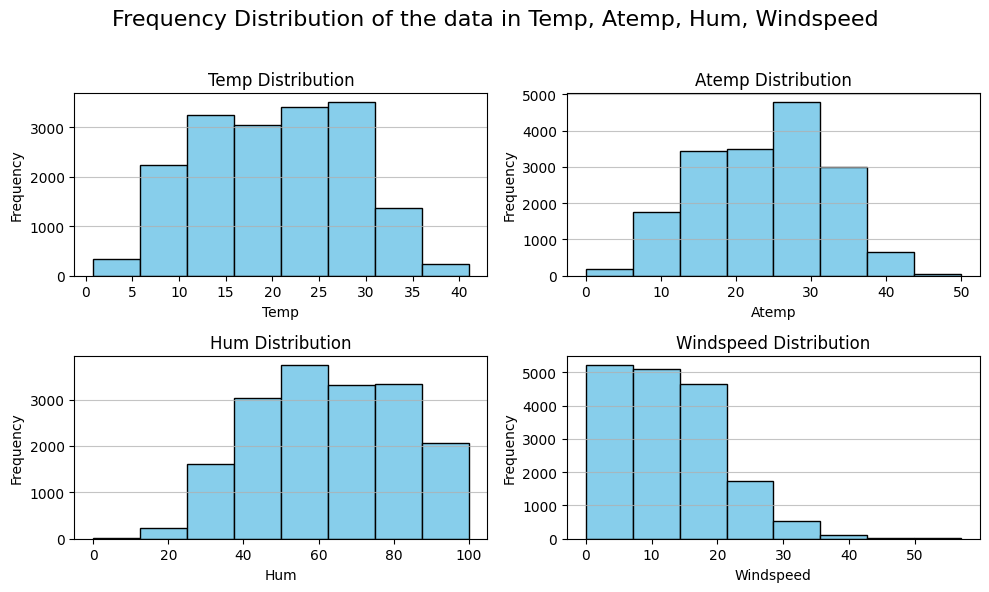

In [9]:
# Plotting histograms for the distribution of temperature, apparent temperature, humidity, and windspeed

columns_to_plot = ['temp', 'atemp', 'hum', 'windspeed']
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs = axs.flatten()

for i, column in enumerate(columns_to_plot):
    ax = axs[i]
    ax.hist(df_visualise[column], bins=8, color='skyblue', edgecolor='black')
    ax.set_title(f'{column.capitalize()} Distribution')
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Frequency')
    ax.grid(axis='y', alpha=0.75)


fig.suptitle('Frequency Distribution of the data in Temp, Atemp, Hum, Windspeed', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Inference**


1.   The temperature plot suggests that majority of temperatures fall inbetween this range (12-32) degree celcius.
2.   The Atemperature plot suggests that majority of temperatures fall inbetween this range (15-35) degree celcius.
3.   The Humidy plot suggests that majority of humidity data fall either in or after the mean humidity.
4.   The windspeed plot is left-skewed, indicating that the majority of windspeed data points are below the mean windspeed.



---



**A Box-Plot Analysis : Temperature, ATemperature, Humidity, and Wind Speed Distribution**

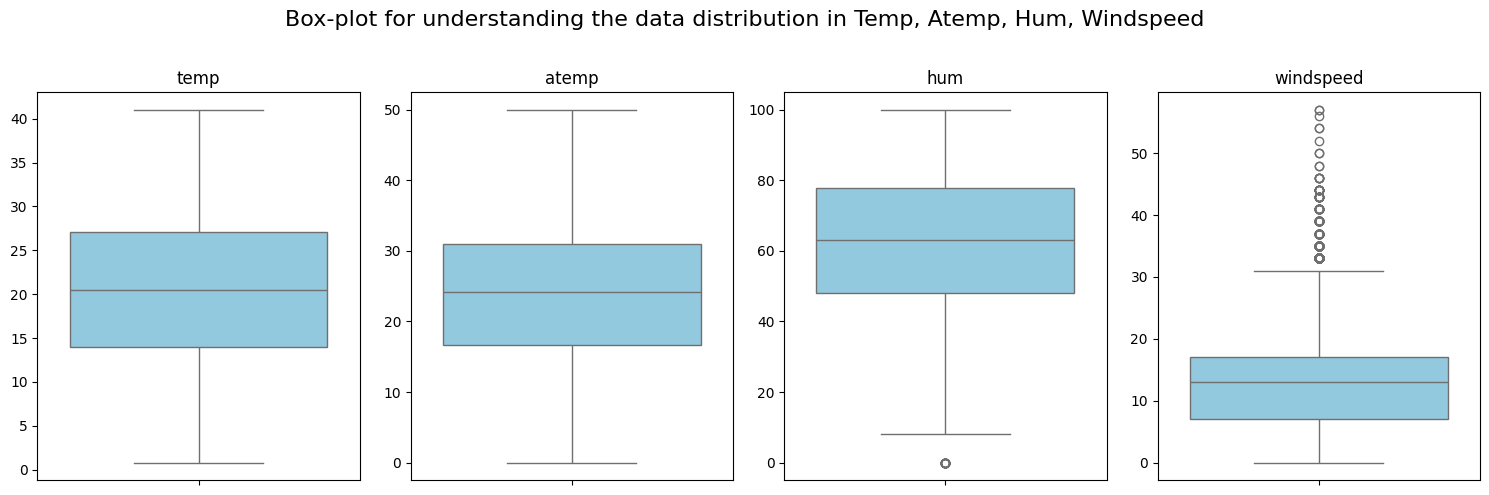

In [ ]:
# Plotting box plots for the distribution of temperature, apparent temperature, humidity, and windspeed

import warnings
warnings.filterwarnings("ignore")

fig, axs = plt.subplots(1, 4, figsize=(15, 5))
float_vars = ['temp', 'atemp', 'hum', 'windspeed']

for i, ax in enumerate(axs):
    # Plot box plot
    sns.boxplot(y=df_visualise[float_vars[i]], ax=ax, color='skyblue')
    ax.set_title(float_vars[i])
    ax.set_xlabel("")
    ax.set_ylabel("")


fig.suptitle('Box-plot for understanding the data distribution in Temp, Atemp, Hum, Windspeed', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Inferences**

1.   temp : no outliers
2.   atemp : no outliers
3.   hum : no outliers
4.   windpseed : many outliers observed and considerable count of elements fall in the extreme higher value bracket.



---




**Monthly Variation of Temp, Atemp, Humidity, and Windspeed**

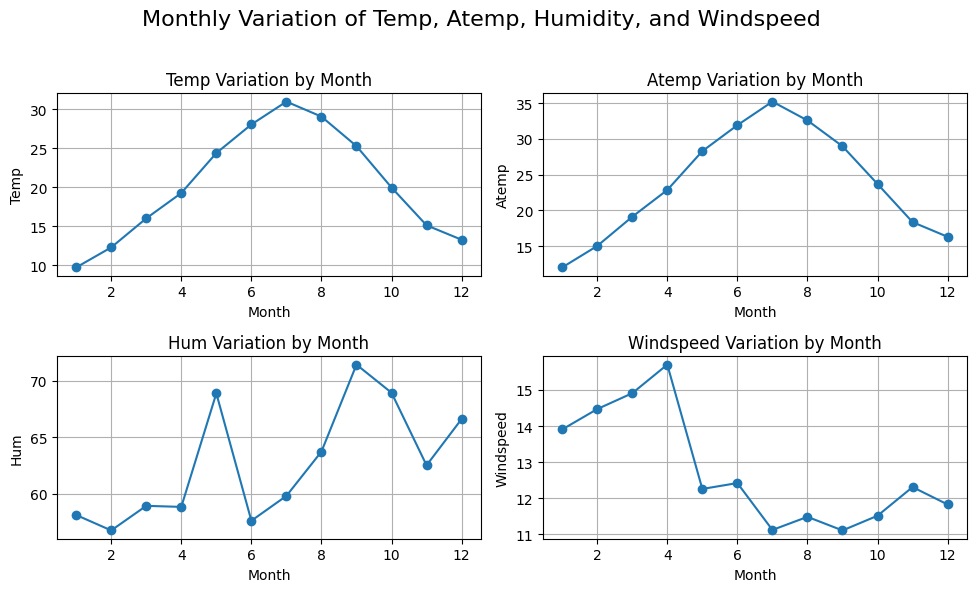

In [10]:
# Plotting the variation of temperature, apparent temperature, humidity, and windspeed by month

columns_to_plot = ['temp', 'atemp', 'hum', 'windspeed']
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs = axs.flatten()

for i, column in enumerate(columns_to_plot):
    ax = axs[i]
    ax.plot(df_visualise.groupby('mnth')[column].mean().reset_index()['mnth'],
            df_visualise.groupby('mnth')[column].mean().reset_index()[column], marker='o')
    ax.set_title(f'{column.capitalize()} Variation by Month')
    ax.set_xlabel('Month')
    ax.set_ylabel(column.capitalize())
    ax.grid(True)

fig.suptitle('Monthly Variation of Temp, Atemp, Humidity, and Windspeed', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Inferences**

1.   temp : normal distribution with max temp around august
2.   atemp : normal distribution with max temp around august
* By Looking at the above plots,we can understand the temperature rise and fall after summer and it is a uniform rise and fall with not much variation.
3.   hum : It appears that humidity is higher in some months (April-June & August-October) and lower in others (Jan-Feb). too much variation is seen.
4.   windpseed : windspeed is highest during april and low in subsequent months.


---




**Histogram of ATemperature by Season with KDE**

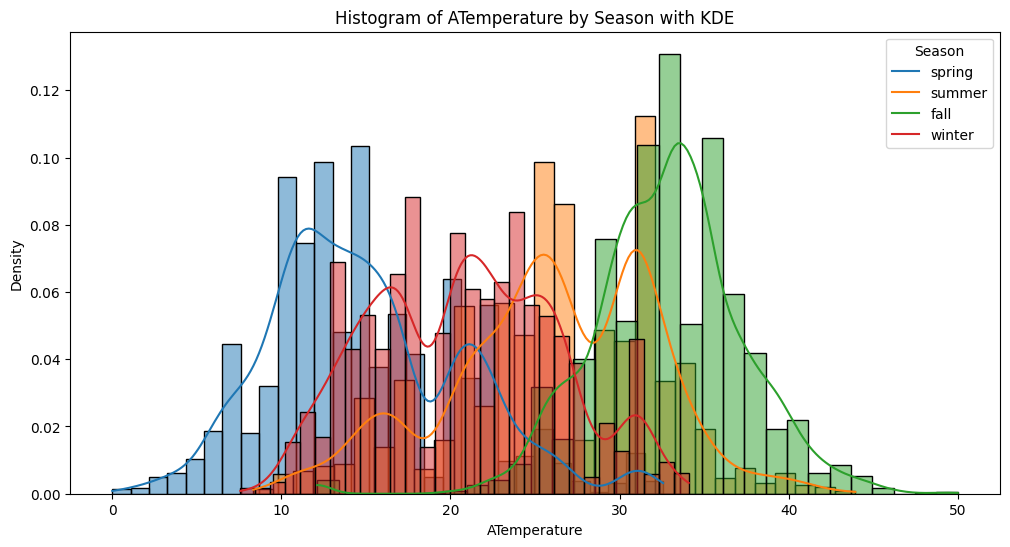

In [ ]:
# Create a stacked histogram showing the distribution of apparent temperature (ATemp) across seasons, with KDE overlaid for each season.

# Define the order of the seasons
season_order = ['spring', 'summer', 'fall', 'winter']

# Create the stacked histogram with separate KDE plots for each season
plt.figure(figsize=(12, 6))
for season in season_order:
    sns.histplot(data=df_visualise[df_visualise['season'] == season], x='atemp', bins=30, kde=True, label=season, stat='density')

#plotting the graph
plt.xlabel('ATemperature')
plt.ylabel('Density')
plt.title('Histogram of ATemperature by Season with KDE')
plt.legend(title='Season', labels=season_order)
plt.show()





---


**Plot of Registered and Casual Rides**

Count of registered users: 2672662
Count of casual users: 620017




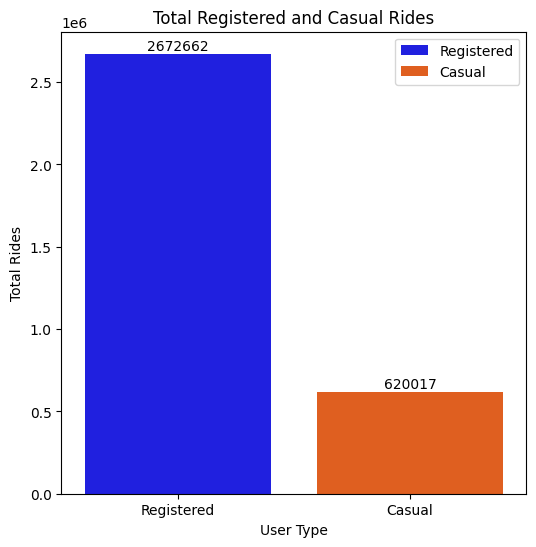

In [ ]:
# Creating a bar chart showing the total rides for registered and casual users, with counts displayed above the bars irrespective of year/month

import warnings
warnings.filterwarnings("ignore")


registered_sum = df_visualise['registered'].sum()
casual_sum = df_visualise['casual'].sum()

# Create a bar chart to visualize the total rides
plt.figure(figsize=(6, 6))

# Use sns.barplot() to create the bar chart
bars = sns.barplot(x=["Registered", "Casual"], y=[registered_sum, casual_sum], palette=["blue", "#ff5400"])

# Add labels and a title to the plot
plt.xlabel("User Type")
plt.ylabel("Total Rides")
plt.title("Total Registered and Casual Rides")

# Add text labels for counts above the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

# Create a legend
plt.legend(handles=bars.patches, labels=["Registered", "Casual"])

print(f"Count of registered users: {registered_sum}")
print(f"Count of casual users: {casual_sum}")
print("\n")

plt.show()




**Inference**
The count of registered users is much higher than the count of casual users.

(78% of the users are registered users and 22% are casual users)


---



#Understanding the relationship between count and other columns

To understand the effect of ['temp', 'atemp', 'hum', and 'windspeed'] on 'cnt', I performed the following steps:

**Binning the Data:**

Each column ('temp', 'atemp', 'hum', 'windspeed') was divided into 5 bins of uniform range.
For example, for the 'temp' column, if the range is 0 to 40, the bins would be 0-8, 8-16, 16-24, 24-32, and 32-40.

**Summing Counts Within Each Bin:**

For each bin, I calculated the sum of the 'cnt' values that fall within that bin range.
This was done using the pd.cut function to create bins and the groupby method to sum the 'cnt' values within each bin.

**Visualizing the Binned Data:**

I created histograms for each column to visualize the frequency distribution of the data across the bins.
Additionally, Iprinted the sum of 'cnt' values for each bin to provide a numerical summary of the distribution.

---



**Impact of Temperature, Feeling Temperature, Humidity, and Windspeed on Bike Rental Counts**

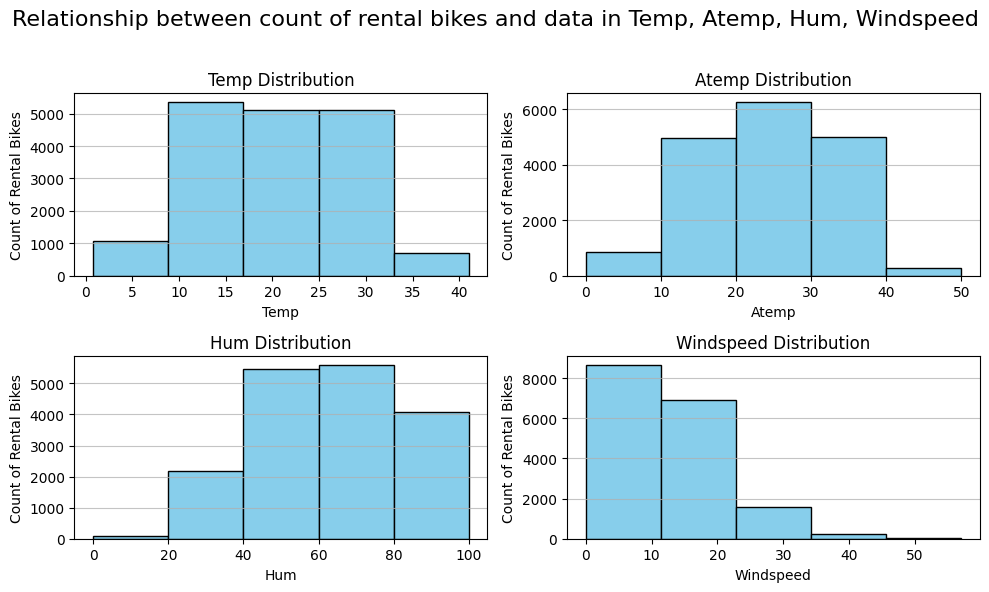

In [11]:
#plotting histogram for understanding the relationship between count and coloumns ['temp', 'atemp', 'hum', 'windspeed']

columns_to_plot = ['temp', 'atemp', 'hum', 'windspeed']
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs = axs.flatten()

for i, column in enumerate(columns_to_plot):
    ax = axs[i]

    # Create bins and calculate sum of counts within each bin
    df_visualise[f'{column}_bin'] = pd.cut(df_visualise[column], bins=5)
    bin_counts = df_visualise.groupby(f'{column}_bin')['cnt'].sum().reset_index()

    # Plot histogram
    ax.hist(df_visualise[column], bins=5, color='skyblue', edgecolor='black')
    ax.set_title(f'{column.capitalize()} Distribution')
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Count of Rental Bikes')
    ax.grid(axis='y', alpha=0.75)

    '''
    # Print bin counts
    print(f'\n{column.capitalize()} bins:')
    print(bin_counts)
    '''

# Add a common title for all subplots
fig.suptitle('Relationship between count of rental bikes and data in Temp, Atemp, Hum, Windspeed', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the super title
plt.show()

**Inferences**


1.   **Temp** : People tend to rent bikes more frequently when the temperature is moderate. The highest number of rentals occurs in the temperature range of 8°C to 32°C, indicating a preference for warm, but not too hot conditions. Very low and very high temperatures see fewer rentals, suggesting that extreme temperatures are less favorable for biking.


2.   **Atemp** : Apparent temperature, which reflects the perceived temperature, shows a similar trend to actual temperature. The most popular range for bike rentals is between 20.0°C and 30.0°C, suggesting that people prefer to rent bikes when it feels warm but still comfortable. Very low or very high apparent temperatures correspond to significantly fewer rentals, highlighting the importance of comfort in perceived temperature for outdoor activities like biking.

3. **Humidity**:
Humidity levels have a significant impact on bike rentals. The highest number of rentals is observed when humidity is between 40.0% and 80.0%, suggesting that moderate humidity is the most comfortable for biking. As humidity increases or decreases from this range, the number of rentals drops, indicating that very dry or very humid conditions are less favorable for bike riding.

4. **Windspeed**:
People prefer to rent bikes when the wind speed is the lowest. The majority of rentals occur when the wind speed is till 12 m/s, indicating that calmer conditions are more preferred to biking. As the wind speed increases, the number of rentals sharply declines, suggesting that high wind speeds are less favorable and potentially more challenging or uncomfortable for biking activities.



---






**Scatter plot of bike rentals vs Temperature, Feeling Temperature, Humidity, and Windspeed**

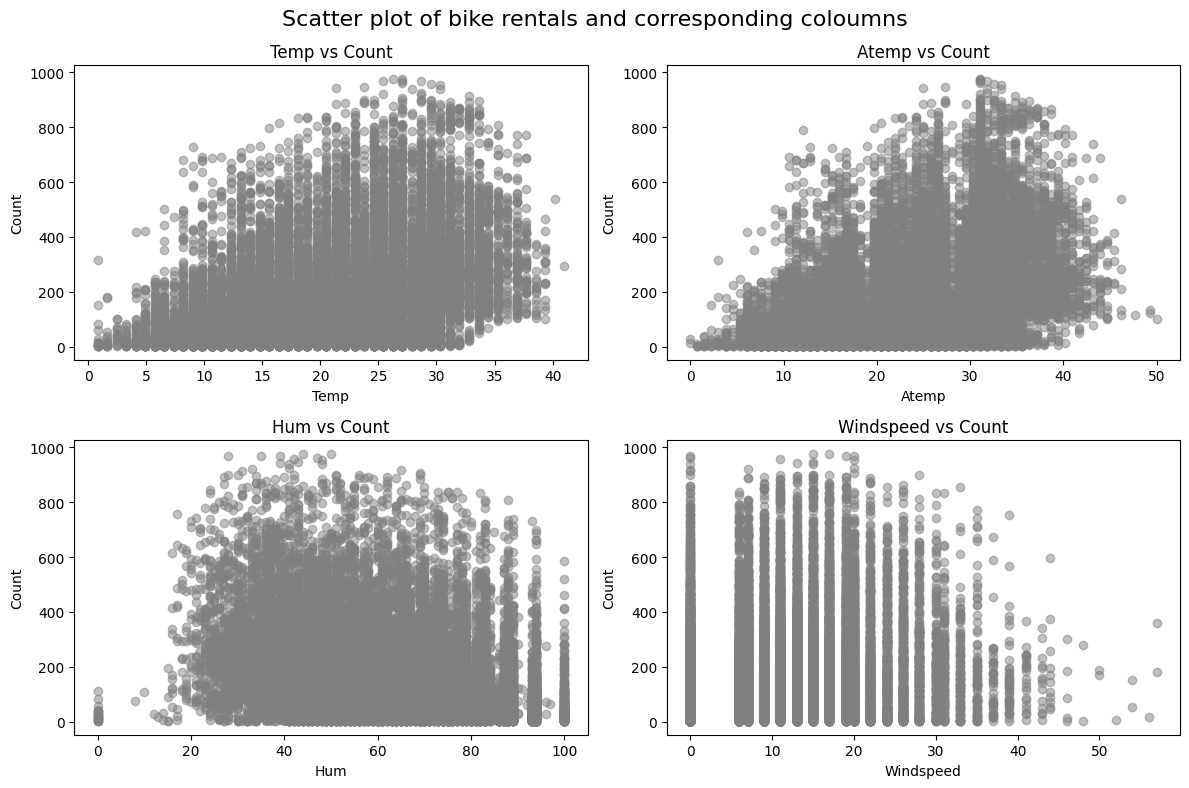

In [ ]:
columns_to_plot = ['temp', 'atemp', 'hum', 'windspeed']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, column in enumerate(columns_to_plot):
    ax = axs[i]
    ax.scatter(df_visualise[column], df_visualise['cnt'], alpha=0.5, color='grey')
    ax.set_title(f'{column.capitalize()} vs Count')
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Count')

# Add a common title for all subplots
fig.suptitle('Scatter plot of bike rentals and corresponding coloumns', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the super title
plt.tight_layout()
plt.show()


**Inferences**
<br>



1.   The scatter plot of cnt versus temp and cnt versus atemp reveals that the number of bikeshare rides rises as the temperature increases. This indicates a correlation between temperature and the number of bikeshare rides.

2.   In contrast, the scatter plot of hum versus cnt shows people prefer lower humidity.

3.  The scatter plot of cnt versus windspeed suggests that the number of bikeshare rides tends to decrease as windspeed increases. We can see most bike rides at the beginning and as windspeed increases scatter decreases.


---



**Bike Rental Users Over Time**

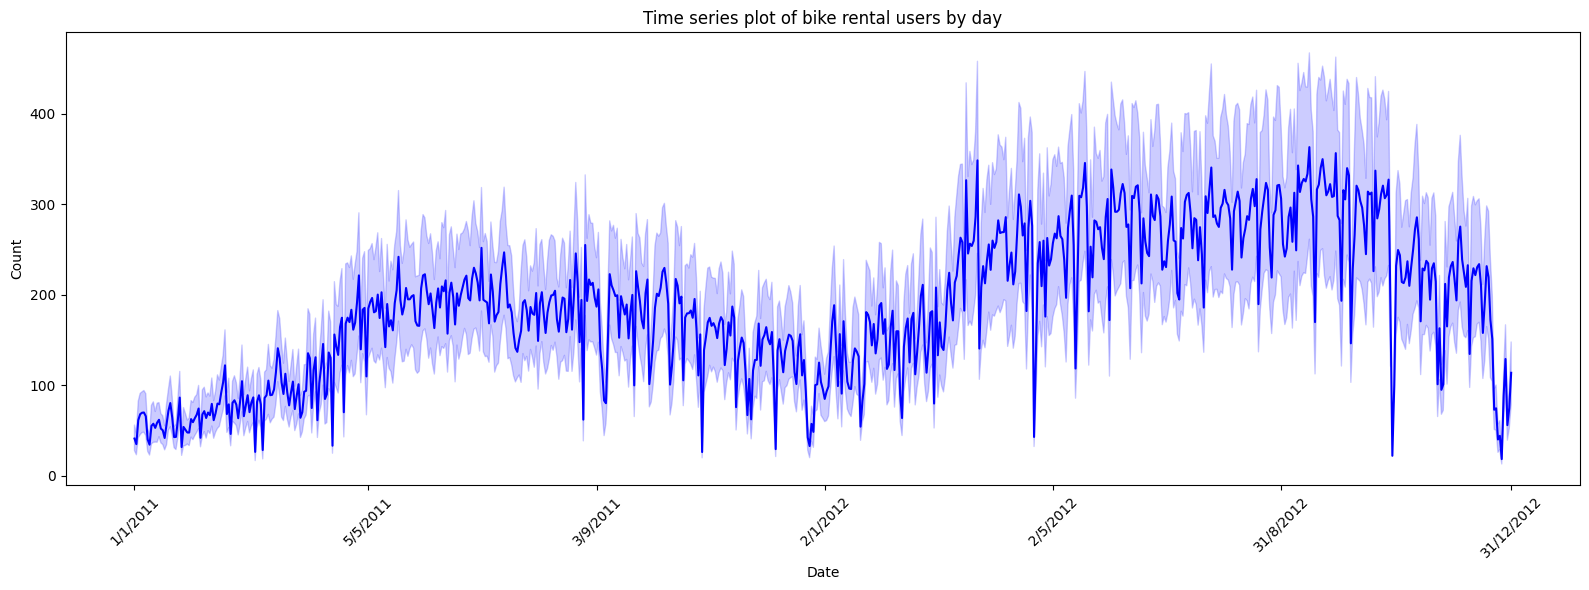

In [11]:
# Time series plot of bikeshare count by dteday coloumn

plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="dteday", y="cnt", data=df, color='blue')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Time series plot of bike rental users by day")

# Take 6 dates in a uniform manner for xticks
xticks_dates = df['dteday'].iloc[::(len(df)//6)]
plt.xticks(xticks_dates, rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

**Inference**
<br>
There has been in sharp increase as summer season nears and a decrease after summer ends. The maximum rentals happended between 4th-8th months of both the years and the sales are higher in 2012 as compared to 2011.



---



**Bike Rentals by Month**

     mnth    cnt
  January 134933
 February 151352
    March 228920
    April 269094
      May 331686
     June 346342
     July 344948
   August 351194
September 345991
  October 322352
 November 254831
 December 211036 



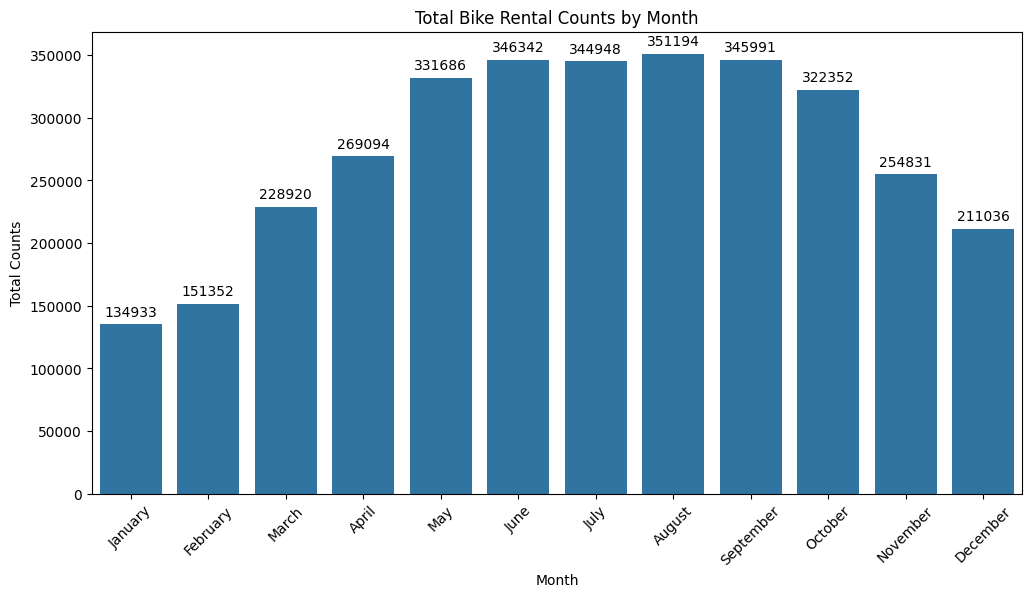

In [15]:
import calendar

# Convert 'mnth' column to categorical with ordered categories
df_visualise['mnth'] = pd.Categorical(df_visualise['mnth'], categories=calendar.month_name[1:], ordered=True)

# Group by month and sum the 'cnt' column
monthly_counts = df_visualise.groupby('mnth')['cnt'].sum().reset_index()

# Print the aggregated counts for each month
print(monthly_counts.to_string(index=False),"\n")

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='mnth', y='cnt', data=monthly_counts)
plt.xlabel('Month')
plt.ylabel('Total Counts')
plt.title('Total Bike Rental Counts by Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

**Inference**

The data indicates that the number of bikeshare rides generally increases from January to August, peaking in the summer months, and then decreases from September to December.


---



**Bike Rentals by Season**

In [44]:
seasonly_users_df = df_visualise.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

seasonly_users_df.head()

,casual,registered,cnt
season,,,
Fall,129782,711831,841613
Spring,203522,715067,918589
Summer,226091,835038,1061129
Winter,60622,410726,471348


**Inference**
<br>
The data indicates that bikeshare rides are most popular during the summer, with both casual and registered users contributing to the highest total ride count. In contrast, winter has the lowest number of rides, reflecting reduced usage likely due to less favorable weather conditions. Spring and fall show subsequent higher usage after summer, with spring slightly more than fall in total rides.

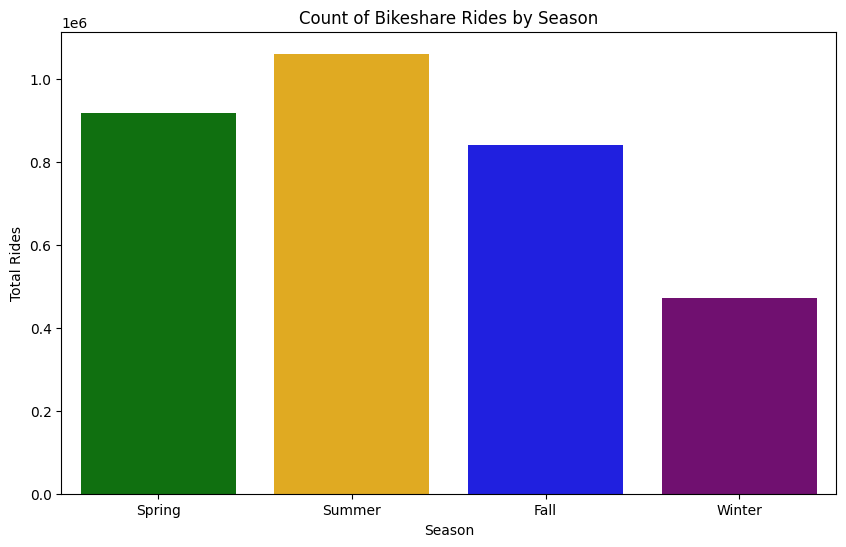

In [49]:
import warnings
warnings.filterwarnings("ignore")

season_order = ['Spring', 'Summer', 'Fall', 'Winter']

# Define a custom palette
custom_palette = {
    'Spring': 'green',
    'Summer': '#ffb703',
    'Fall': 'blue',
    'Winter': 'purple'
}

# Plotting the data using Seaborn with custom colors
plt.figure(figsize=(10, 6))
sns.barplot(x="season", y="cnt", data=seasonly_users_df, order=season_order, palette=custom_palette)
plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of Bikeshare Rides by Season")
plt.show()

**Inference**
<br>
Most number of rides in Summer followed by a small decrease in ride count in spring and fall. The lowest ride is recorded in winter.
So it indicates people prefer to go out more in first 3 seasons and dont prefer
to rent in winter when there is snow.


---



**Monthly count of casual and registered bike share rentals (2011-2012)**

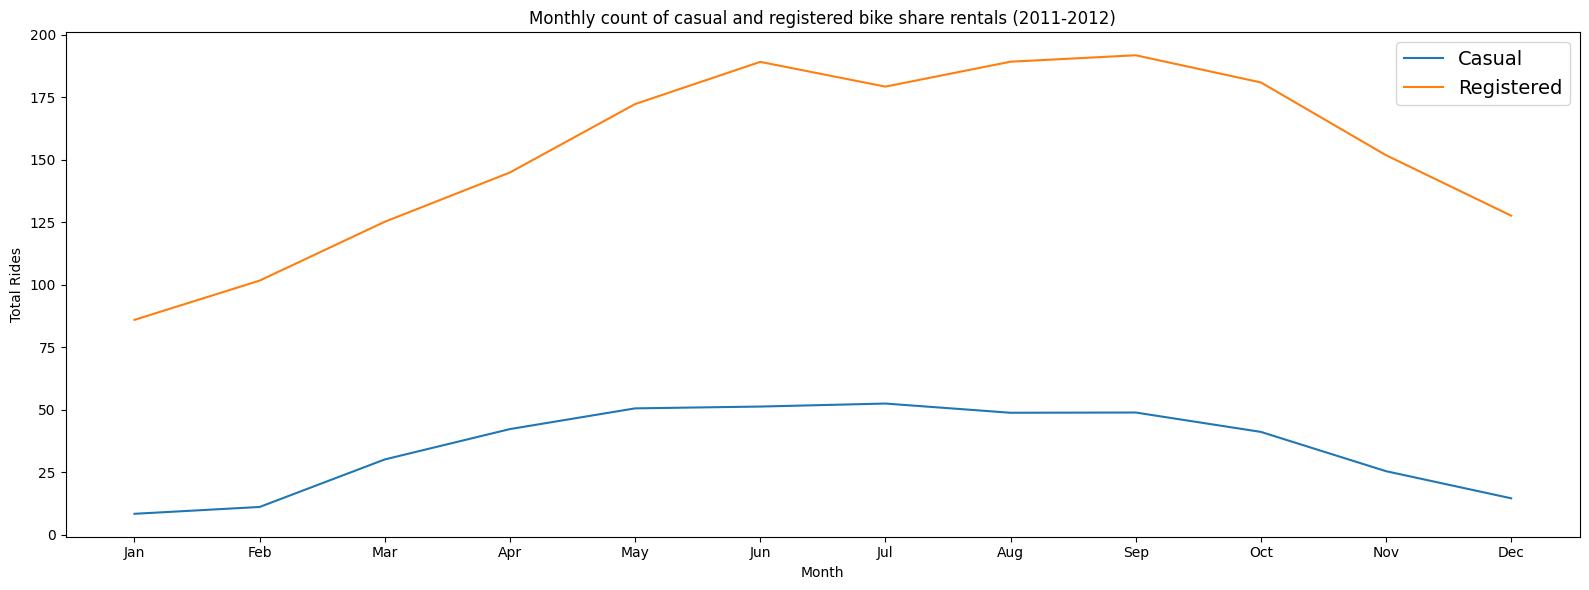

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="mnth", y="casual", data=df_visualise, label='Casual', ci=None)
sns.lineplot(x="mnth", y="registered", data=df_visualise, label='Registered', ci=None)

# Add labels and a title to the plot
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Monthly count of casual and registered bike share rentals (2011-2012)")

# Customize the x-axis to show month names
plt.xticks(range(1, 13), [calendar.month_abbr[m] for m in range(1, 13)])

# Add a legend to the plot
plt.legend(loc='upper right', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


**Insights**

1. The count of bikeshare rides in 2012 are higher than in 2011.

2. The number of registered users outnumber casual users.

3. Count of bikeshare rides typically starts low in start of the year (during end of winter) and continue to rise, then stagnate and then decrease once again when winter starts.

---



**Bike rentals by days**

     weekday     cnt
0     Sunday  444027
1     Monday  455503
2    Tuesday  469109
3  Wednesday  473048
4   Thursday  485395
5     Friday  487790
6   Saturday  477807




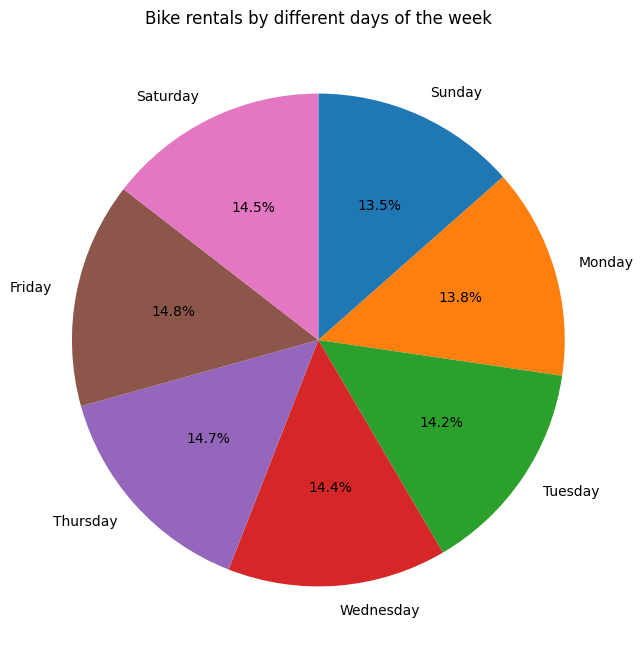

In [19]:
# Understanding the rentals on different days of week

# Data preparation
weekday_counts = df_visualise.groupby('weekday')['cnt'].sum().reset_index()


# Define the days of the week for labeling the pie chart
days_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Map weekday numbers to day names
weekday_counts['weekday'] = weekday_counts['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(weekday_counts['cnt'], labels=weekday_counts['weekday'], startangle=90, counterclock=False, autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Bike rentals by different days of the week')

print(weekday_counts)
print("\n")
plt.show()


**Inferences**
<br>
1. The data shows a relatively equal distribution of bikeshare ride counts across weekdays, with a slight increase or decrease of around 1% among the days.
2. Weekdays, especially Thursday and Friday, exhibit higher ride counts compared to weekends, where Saturday and Sunday demonstrate lower usage patterns. ( even this difference is around than +-1%)





**Rentals by User Type and Weekday**

 weekday  registered  casual
       0      303506  140521
       1      384719   70784
       2      411266   57843
       3      415729   57319
       4      423935   61460
       5      409552   78238
       6      323955  153852




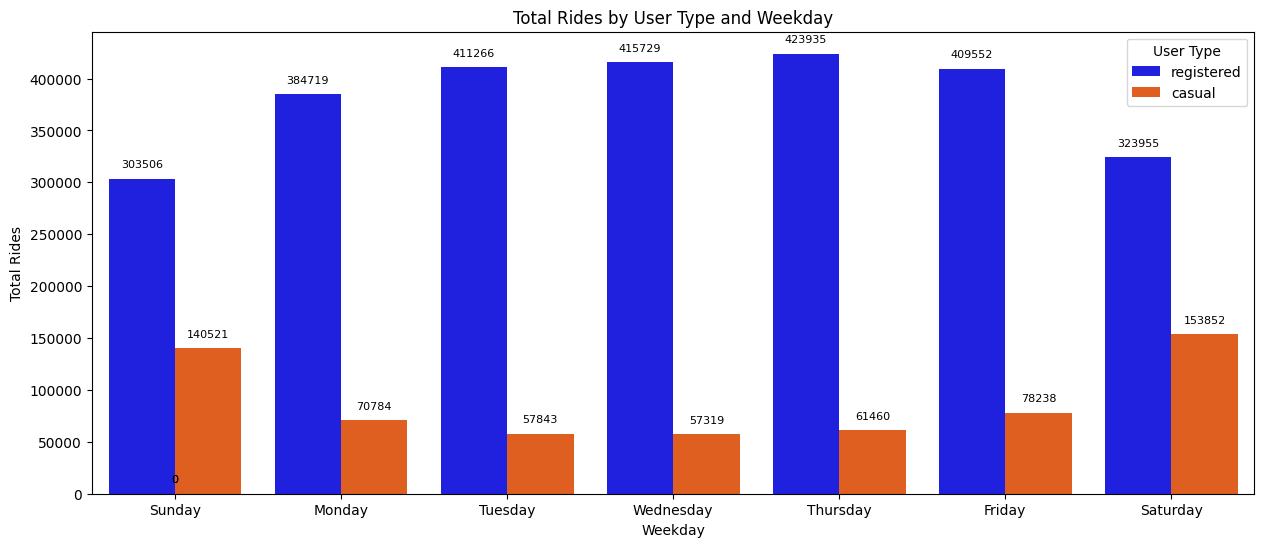

In [56]:
# Calculate the total rides for each weekday
weekday_totals = df_visualise.groupby('weekday')[['registered', 'casual']].sum().reset_index()

# Create a grouped bar chart
plt.figure(figsize=(15, 6))
sns.barplot(x='weekday', y='value', hue='variable', data=pd.melt(weekday_totals, ['weekday']), palette=["blue", "#ff5400"])

# Add counts above each bar with smaller text
for p in plt.gca().patches:
    plt.gca().annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.xlabel('Weekday')
plt.ylabel('Total Rentals')
plt.title('Total Rentals by User Type and Weekday')
plt.legend(title='User Type')
plt.xticks(ticks=range(0, len(weekday_totals['weekday'])), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

print(weekday_totals.to_string(index=False))

print("\n")
plt.show()


**Inferences**
<br>
1. The data shows that weekdays (Monday to Friday) have higher total rides compared to weekends (Saturday and Sunday), with Thursday having the highest total rides among all weekdays.
2. Casual users tend to contribute more to the total rides on weekends, while registered users dominate the total rides on weekdays.

---



**Rentals vs Holidays**

 holiday     cnt
       0 3214244
       1   78435


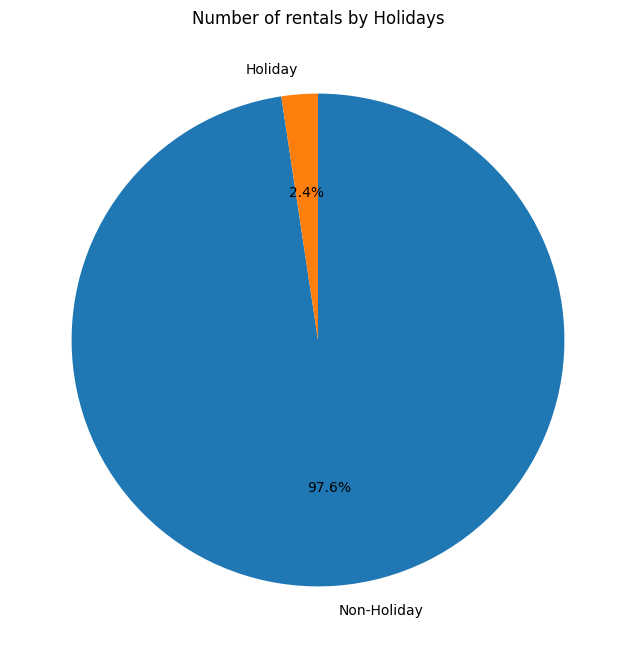

In [50]:
# understanding the relation between number of rentals and holidays

# Data preparation
holiday_counts = df_visualise.groupby('holiday')['cnt'].sum().reset_index()

# Define the days of the week for labeling the pie chart
holidays_label = ['Non-Holiday', 'Holiday']

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(holiday_counts['cnt'], labels=holidays_label, startangle=90, counterclock=False, autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Number of rentals by Holidays')

print(holiday_counts.to_string(index=False))
plt.show()

**Inference**

This suggests that the majority of bikeshare rides occur on non-holidays, highlighting a clear difference in usage patterns between these two categories.

***But this does not provide a solid inference as the total number of holidays is very less as comapred to number of non-holidays.
I am going a step deeper and comparing the difference in avg rentals in holidays and non holidays.***


In [20]:
# Count the total number of holidays and non-holidays
total_holidays = df_visualise['holiday'].sum()
total_non_holidays = len(df_visualise) - total_holidays

# Group by 'holiday' and sum the 'cnt' values
holiday_counts = df_visualise.groupby('holiday')['cnt'].sum().reset_index()

# Calculate the average usage on holidays and non-holidays
holiday_counts['avg_usage'] = holiday_counts.apply(
    lambda row: int (row['cnt'] / (total_holidays if row['holiday'] == 1 else total_non_holidays)),
    axis=1
)

# Print the results
print(holiday_counts.to_string(index=False))

 holiday     cnt  avg_usage
       0 3214244        190
       1   78435        156


**Inference**
<br>
The average bike share usage on non-holiday days (190) is significantly higher than on holiday days (156), suggesting that holidays have a noticeable impact on bike rental patterns, with fewer people using the service compared to regular days.
Non-Holidays still employ slightly more bike rentals than holidays suggesting our bikes might be preferred for commute purpose.

---



**Bike Rentals by Hour**

 hr  registered  casual
  0       31755    7375
  1       19455    4709
  2       12940    3412
  3        6281    1893
  4        3554     874
  5       13249    1012
  6       52115    3017
  7      146134    8037
  8      245240   15761
  9      136980   22458
 10       92468   33789
 11      108034   43286
 12      134696   49718
 13      132206   52713
 14      120563   55089
 15      128543   54606
 16      173914   53834
 17      282640   54220
 18      265276   44496
 19      191284   35505
 20      138172   26378
 21      104875   20570
 22       79412   16200
 23       52876   11065




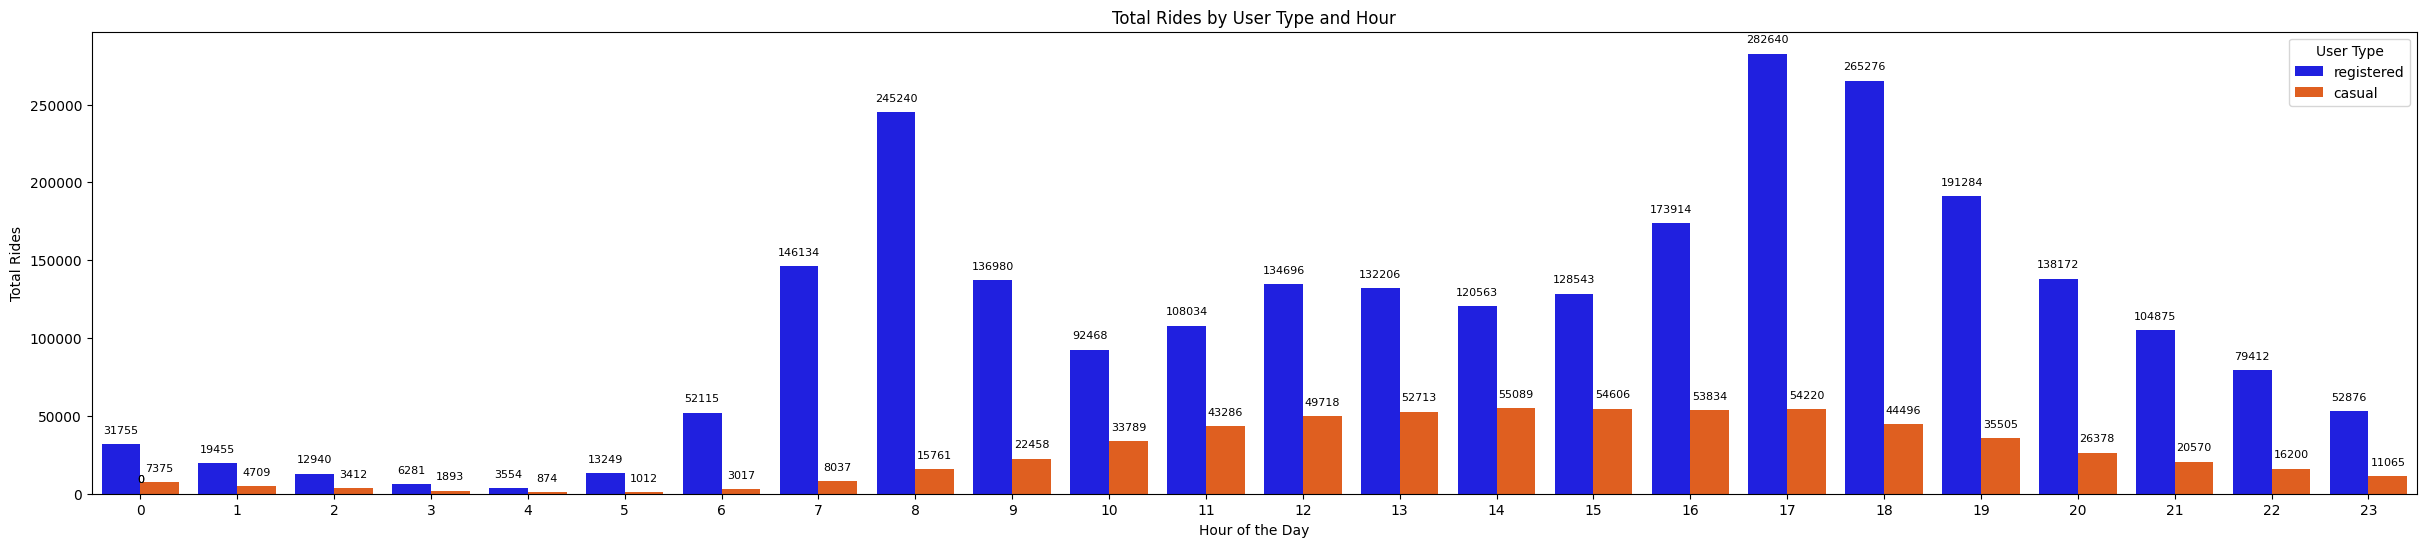

In [ ]:
# Calculate the total rides for each hour

hourly_totals = df_visualise.groupby('hr')[['registered', 'casual']].sum().reset_index()

# Create a grouped bar chart
plt.figure(figsize=(30, 6))
sns.barplot(x='hr', y='value', hue='variable', data=pd.melt(hourly_totals, ['hr']), palette=["blue","#ff5400"])

# Add counts above each bar with smaller text
for p in plt.gca().patches:
    plt.gca().annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.xlabel('Hour of the Day')
plt.ylabel('Total Rides')
plt.title('Total Rides by User Type and Hour')
plt.legend(title='User Type')
plt.xticks(ticks=range(0, len(hourly_totals['hr'])), labels=hourly_totals['hr'])

print(hourly_totals.to_string(index=False))

print("\n")
plt.show()


**Inferences**

1. The data suggests that the majority of registered bikeshare rides occur during typical commuting hours, with peaks around 8-9 am and 5-6 pm. This indicates that registered users likely include commuters who use the bikeshare service for their daily work commute.

2. Casual rides, on the other hand, show a different pattern, with peaks during midday and early afternoon hours. This suggests that casual users, who may include tourists or occasional riders, are more active during leisure hours rather than specific commuting times.

**Bike Rentals vs Grouped hours of day**


Hour bins:

hr_bin     cnt
   0-6  161641
  6-12 1036601
 12-18 1418100
 18-23  676337 



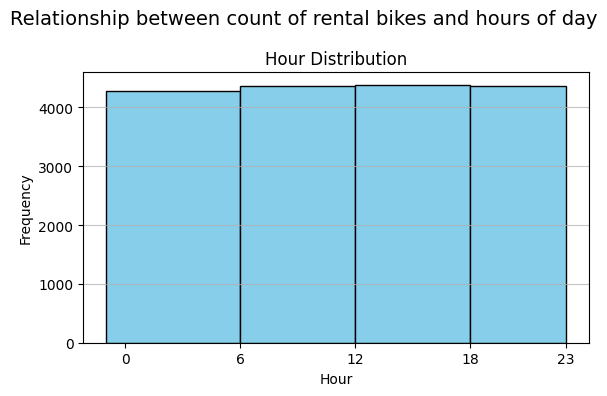

In [ ]:
# visualizing the rentals vs different grouped hours of day

fig, ax = plt.subplots(figsize=(6, 4))

# Create bins and calculate sum of counts within each bin
df_visualise['hr_bin'] = pd.cut(df_visualise['hr'], bins=[-1, 6, 12, 18, 23], labels=['0-6', '6-12', '12-18', '18-23'])
bin_counts = df_visualise.groupby('hr_bin')['cnt'].sum().reset_index()

fig.suptitle('Relationship between count of rental bikes and hours of day', fontsize=14)
# Plot histogram
ax.hist(df_visualise['hr'], bins=[-1, 6, 12, 18, 23], color='skyblue', edgecolor='black')
ax.set_title('Hour Distribution')
ax.set_xlabel('Hour')
ax.set_ylabel('Frequency')
ax.grid(axis='y', alpha=0.75)

# Set x-axis ticks
ax.set_xticks([0, 6, 12, 18, 23])
ax.set_xticklabels(['0', '6', '12', '18', '23'])

# Print bin counts
print('\nHour bins:\n')
print(bin_counts.to_string(index=False),"\n")

plt.tight_layout()
plt.show()


**Inference**

The data indicates that the majority of bikeshare rides occur between the hours of 6 AM to 6 PM, with the highest count observed during the 12-18 (12 PM to 6 PM) bin. This suggests that the bikeshare service is predominantly used during daytime hours, possibly for commuting to work or other daytime activities.


---



**Bike Rentals by weather**

                                                                             weathersit  registered  casual     cnt
                                                       Clear, Few clouds, Partly cloudy     1875428  462745 2338173
                           Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist      661471  134481  795952
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds      135548   22783  158331
                             Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog         215       8     223





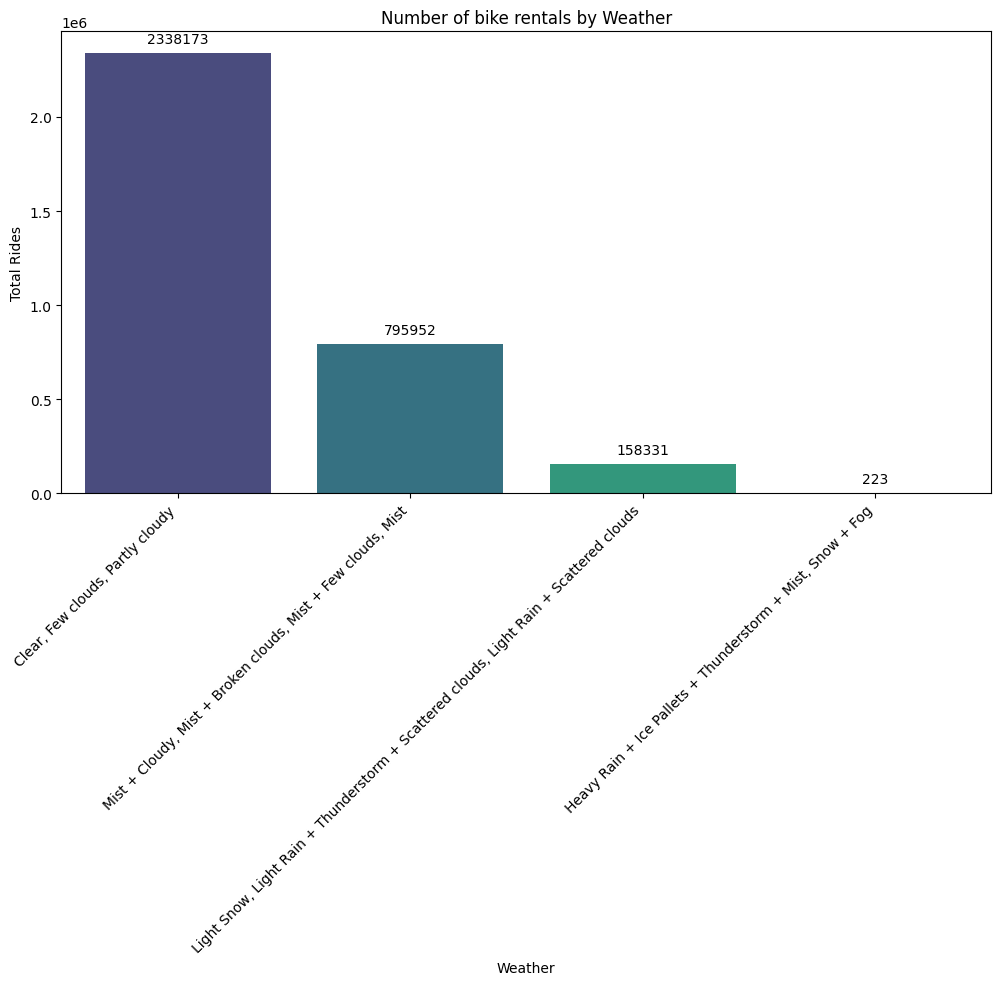

In [ ]:
# Bar chart for count vs different weathers

# Group by 'weathersit' and sum the 'registered', 'casual', and 'cnt' columns
weatherly_users_df = df_visualise.groupby('weathersit')[['registered', 'casual', 'cnt']].sum().reset_index()

# Group by 'weathersit' and sum the 'registered', 'casual', and 'cnt' columns
weatherly_users_df = df_visualise.groupby('weathersit')[['registered', 'casual', 'cnt']].sum().reset_index()

# Map 'weathersit' to descriptions
weathersit_mapping = {
    1: "Clear, Few clouds, Partly cloudy",
    2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
    3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
    4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
}

weatherly_users_df['weathersit'] = weatherly_users_df['weathersit'].map(weathersit_mapping)

# Print the resulting DataFrame without the index
print(weatherly_users_df.to_string(index=False))

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="weathersit", y="cnt", data=weatherly_users_df, palette="viridis")

# Add counts above each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.xlabel("Weather")
plt.ylabel("Total Rides")
plt.title("Number of bike rentals by Weather")
plt.xticks(rotation=45, ha='right')
print("\n\n")
plt.show()

**Inferences**
<br>
1. Clear, Few clouds, Partly cloudy: This weather condition has the highest number of rides. It indicates that people are more likely to use bikeshare services during clear or slightly cloudy weather.

2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist: This weather condition has a moderate number of rides compared to clear weather. It suggests that while misty and cloudy conditions may reduce the number of rides compared to clear weather, there is still a considerable demand for bikeshare services.

3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds: These conditions have the lowest number of rides among the listed weather types. It indicates that people are less likely to use bikeshare services during light snow or rain with scattered clouds, possibly due to safety concerns or discomfort.

4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog: These extreme weather conditions have an extremely low number of rides, both in registered and casual categories. It suggests that bikeshare usage significantly drops during heavy rain, thunderstorms, snow, and fog, highlighting the strong impact of severe weather on bikeshare ride usage.

---




**Pearson Correlation Matrix of all parameters**

In [ ]:
df_visualise.corr(numeric_only=True)

,instant,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
yr,0.866014,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.039222,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929


**Pearson Correlation Heatmap**

<Axes: >

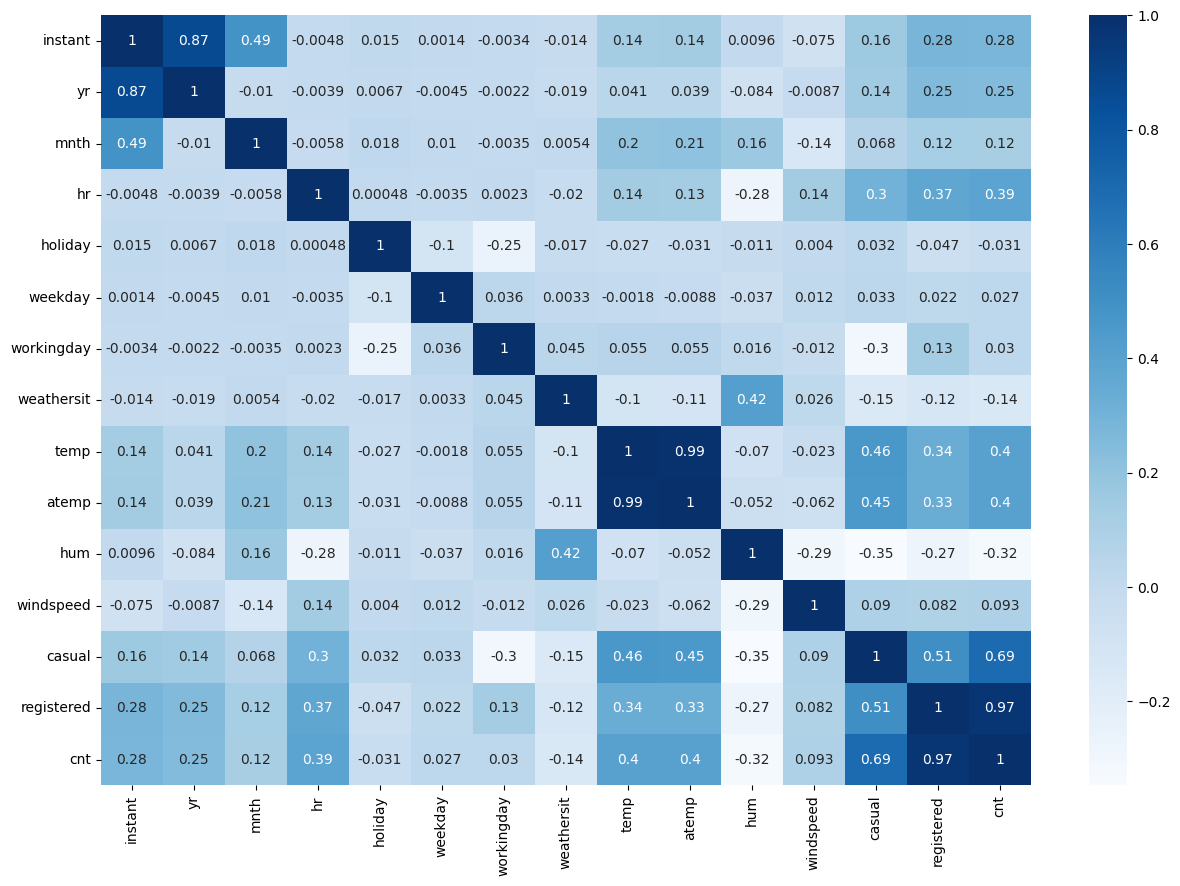

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_visualise.corr(numeric_only=True), annot=True,cmap="Blues")

**Inferences from Correlation Matrix**

Here are some of the key inferences from the correlation matrix:

1. **Temperature (temp) and "feels-like" temperature (atemp) are highly correlated:** With a correlation coefficient of approximately 0.99, temp and atemp are almost identical, suggesting they provide redundant information. This implies multicollinearity, which might affect the performance of models that assume predictors are independent.

2. **Seasonal variations:** The variables mnth (month) and weathersit (weather situation) have some correlation with cnt (total rides), indicating that seasonal and weather changes may impact bikeshare usage.

3. **Time-related factors:** The variables hr (hour), weekday, and workingday are also correlated with cnt, indicating that the time of day and day of the week can influence bikeshare usage patterns.

4. **Weather impact:** weathersit is negatively correlated with cnt, indicating that poorer weather conditions are associated with fewer bikeshare rides.

5. **Holiday effect:** holiday has a negative correlation with cnt, suggesting that bikeshare usage might be lower on holidays.

6. **Humidity (hum) and windspeed (windspeed):** These variables have a moderate negative correlation with cnt, indicating that higher humidity and windspeed might lead to slightly fewer bikeshare rides.

7. **Yearly trend:** yr (year) has a strong positive correlation with cnt, suggesting that bikeshare usage has increased over the years.

8. **Registered vs. casual users:** Both registered and casual users have positive correlations with cnt, but casual users have a stronger correlation, indicating that casual users might be more sensitive to external factors like weather.



---



---

